In [114]:
import numpy as np
import os

In [115]:
# Precision of fortran tag
int_precision = 'int32'
# Precision of data in input file
float_precision = 'float32'
# Precision of data in input file
logical_precision = 'int32'

In [116]:
# Initialize outputs in case file does not exist or is empty
nodata = -9999
date_time = {
    'year': nodata,
    'month': nodata,
    'day': nodata,
    'hour': nodata,
    'min': nodata,
    'sec': nodata,
    'dofyr': nodata,
    'pentad': nodata
}

obs_assim = []
obs_species = []
obs_tilenum = []
obs_lon = []
obs_lat = []
obs_obs = []
obs_obsvar = []
obs_fcst = []
obs_fcstvar = []
obs_ana = []
obs_anavar = []

# Determine machine format
machfmt = 'b'

In [117]:
# Get a list of files with a similar name in a directory
test_data = '/Users/amfox/Desktop/GEOSldas_diagnostics/test_data'
path = test_data
file_name = 'ASCAT_da_test.ens_avg'
file_name = 'DAv8a.ens_avg'
file_name = 'UpT13_da.ens_avg.ldas_ObsFcstAna.20150401'
file_ext = '.bin'
files = [file for file in os.listdir(path) if file.startswith(file_name) and file.endswith(file_ext)]

print(files)

['UpT13_da.ens_avg.ldas_ObsFcstAna.20150401_1200z.bin', 'UpT13_da.ens_avg.ldas_ObsFcstAna.20150401_0600z.bin', 'UpT13_da.ens_avg.ldas_ObsFcstAna.20150401_1800z.bin', 'UpT13_da.ens_avg.ldas_ObsFcstAna.20150401_0300z.bin', 'UpT13_da.ens_avg.ldas_ObsFcstAna.20150401_2100z.bin', 'UpT13_da.ens_avg.ldas_ObsFcstAna.20150401_0900z.bin', 'UpT13_da.ens_avg.ldas_ObsFcstAna.20150401_1500z.bin']


In [118]:
# Open each file in turn
mode = 'rb' if machfmt == 'b' else 'rl'

for file in files:
    with open(os.path.join(path, file), mode) as ifp:
        print ('Reading file ', file, '...')
        
        # Read N_obs and time stamp entry
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        N_obs = np.fromfile(ifp, int_precision, 1)
        N_obs = int(N_obs)
        year = np.fromfile(ifp, int_precision, 1)
        month = np.fromfile(ifp, int_precision, 1)
        day = np.fromfile(ifp, int_precision, 1)
        hour = np.fromfile(ifp, int_precision, 1)
        minute = np.fromfile(ifp, int_precision, 1)
        second = np.fromfile(ifp, int_precision, 1)
        dofyr = np.fromfile(ifp, int_precision, 1)
        pentad = np.fromfile(ifp, int_precision, 1)
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        # Populate date_time structure
        date_time = {
            'year': year,
            'month': month,
            'day': day,
            'hour': hour,
            'min': minute,
            'sec': second,
            'dofyr': dofyr,
            'pentad': pentad
        }
        
        # Read observation assim flag
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        tmp_data = np.fromfile(ifp, logical_precision, N_obs)
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        tmp_data2 = np.zeros((N_obs, 1))
        indices = np.where(tmp_data != 0)[0]
        tmp_data2[indices] = 1
        obs_assim = np.append(obs_assim, tmp_data2)
        
        # Read species information
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_species = np.append(obs_species, np.fromfile(ifp, int_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        
        # Read tile number information
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_tilenum = np.append(obs_tilenum, np.fromfile(ifp, int_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)

        # Read longitude
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_lon = np.append(obs_lon, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)

        # Read latitude
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_lat = np.append(obs_lat, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        
        # Read observation value
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_obs = np.append(obs_obs, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)

        # Read observation variance
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_obsvar = np.append(obs_obsvar, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)

        # Read observation-space model forecast value
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_fcst = np.append(obs_fcst, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)

        # Read observation-space model forecast variance
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_fcstvar = np.append(obs_fcstvar, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)

        # Read observation-space analysis value
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_ana = np.append(obs_ana, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)

        # Read observation-space analysis variance
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        obs_anavar = np.append(obs_anavar, np.fromfile(ifp, float_precision, N_obs))
        fortran_tag = np.fromfile(ifp, int_precision, 1)
        
        
# Close file
    ifp.close()
    
print('Total number of obs = ',len(obs_assim))

Reading file  UpT13_da.ens_avg.ldas_ObsFcstAna.20150401_1200z.bin ...
Reading file  UpT13_da.ens_avg.ldas_ObsFcstAna.20150401_0600z.bin ...
Reading file  UpT13_da.ens_avg.ldas_ObsFcstAna.20150401_1800z.bin ...
Reading file  UpT13_da.ens_avg.ldas_ObsFcstAna.20150401_0300z.bin ...
Reading file  UpT13_da.ens_avg.ldas_ObsFcstAna.20150401_2100z.bin ...
Reading file  UpT13_da.ens_avg.ldas_ObsFcstAna.20150401_0900z.bin ...
Reading file  UpT13_da.ens_avg.ldas_ObsFcstAna.20150401_1500z.bin ...
Total number of obs =  155101


In [119]:
smap_obs = (obs_species < 5)
ascat_obs = (obs_species > 4)

In [120]:
test = obs_ana<-1000
obs_ana[test] = 250.0

0.1133527568837842
0.16487063335221974


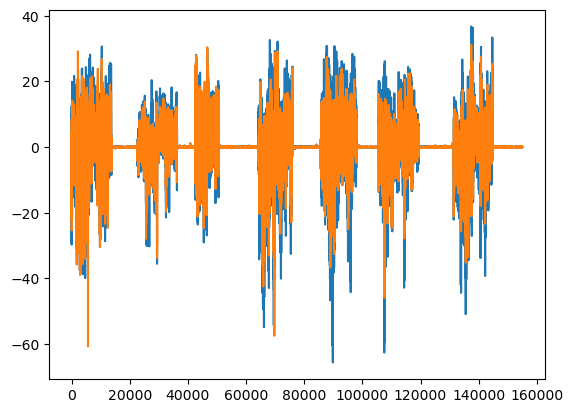

In [121]:
import matplotlib.pyplot as plt

plt.plot(obs_obs - obs_fcst)

print(np.mean(obs_obs - obs_fcst))

plt.plot(obs_obs - obs_ana)

print(np.mean(obs_obs - obs_ana))


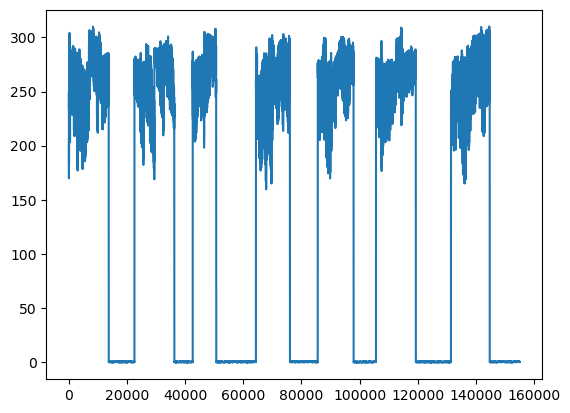

In [122]:
plt.plot(obs_obs)

155101


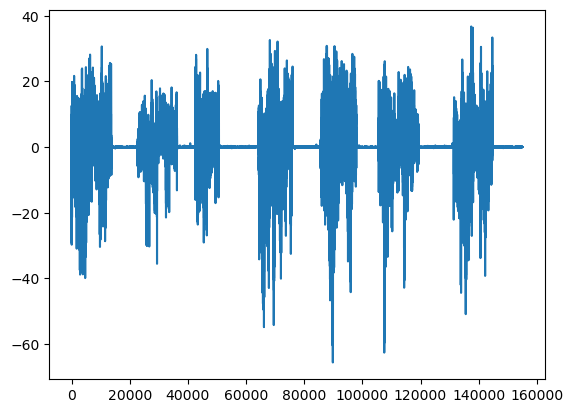

In [123]:
OmF = (obs_obs - obs_fcst)
OmA= (obs_obs - obs_ana)
plt.plot(OmF)

print(obs_obs.size)


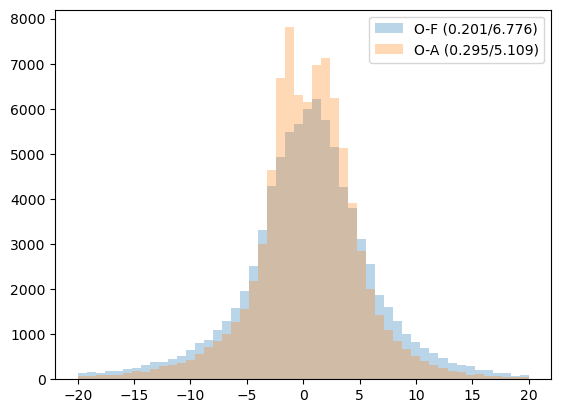

In [124]:


bin_edges = np.linspace(-20, 20, 51)
#bin_edges = np.linspace(-0.15, 0.15, 51)
n1, bins, patches = plt.hist(OmF[smap_obs], density=False, bins=bin_edges, alpha=0.3,label='O-F ({:.3f}/{:.3f})'.format(np.mean(OmF[smap_obs]), np.std(OmF[smap_obs])))
n2, bins, patches = plt.hist(OmA[smap_obs], density=False, bins=bin_edges, alpha=0.3,label='O-A ({:.3f}/{:.3f})'.format(np.mean(OmA[smap_obs]), np.std(OmA[smap_obs])))
plt.legend()

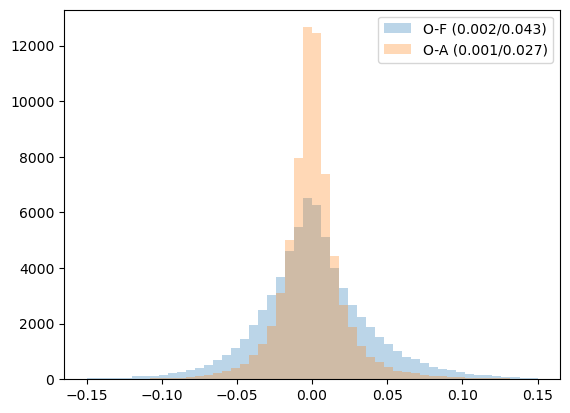

In [125]:
#bin_edges = np.linspace(-20, 20, 51)
bin_edges = np.linspace(-0.15, 0.15, 51)
n1, bins, patches = plt.hist(OmF[ascat_obs], density=False, bins=bin_edges, alpha=0.3,label='O-F ({:.3f}/{:.3f})'.format(np.mean(OmF[ascat_obs]), np.std(OmF[ascat_obs])))
n2, bins, patches = plt.hist(OmA[ascat_obs], density=False, bins=bin_edges, alpha=0.3,label='O-A ({:.3f}/{:.3f})'.format(np.mean(OmA[ascat_obs]), np.std(OmA[ascat_obs])))
plt.legend()

In [126]:
obs_inc = obs_ana - obs_fcst

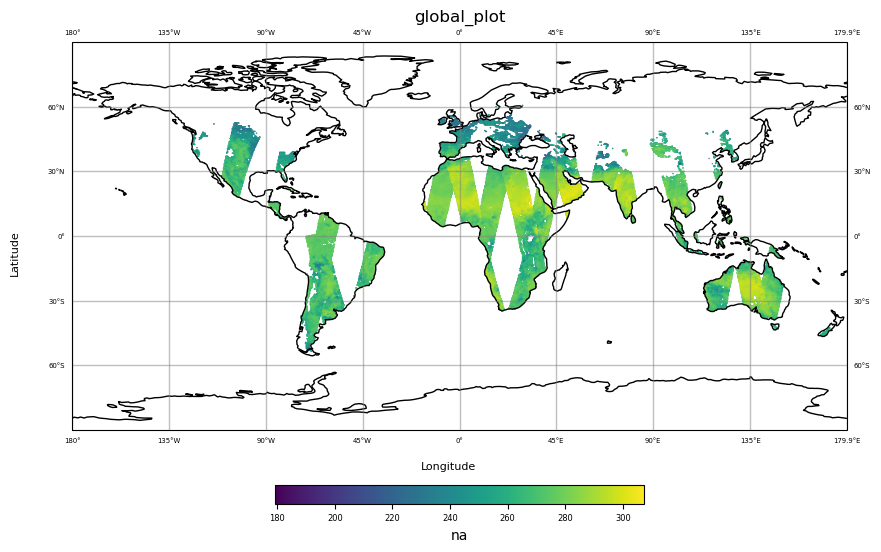

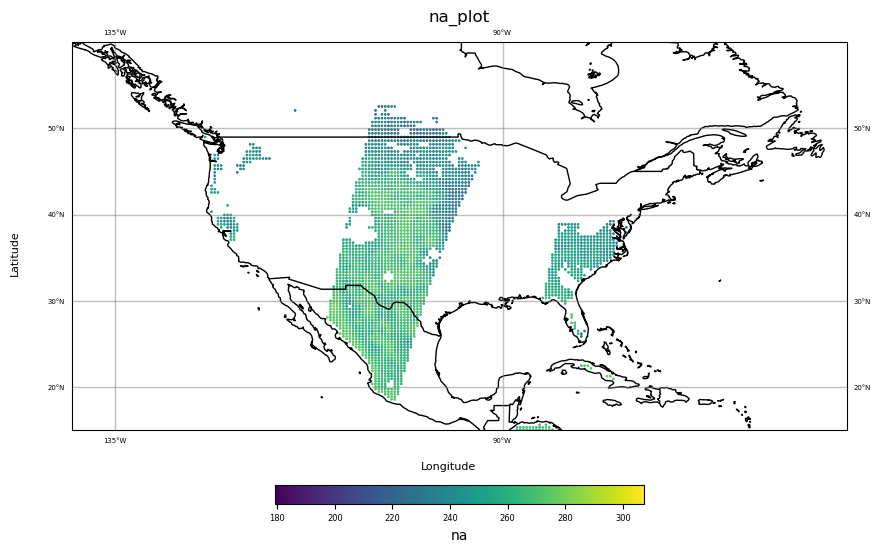

In [127]:
from mapper_functions import plot_global 
from mapper_functions import plot_na

z = obs_fcst[smap_obs]
x = obs_lon[smap_obs]
y = obs_lat[smap_obs]

toPlot = np.column_stack((z,x,y))
plot_global(toPlot)
plot_na(toPlot)

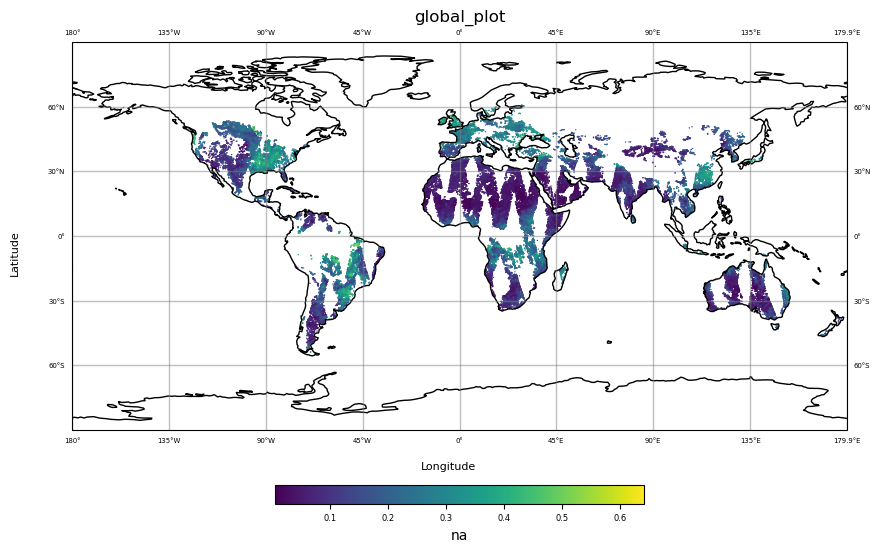

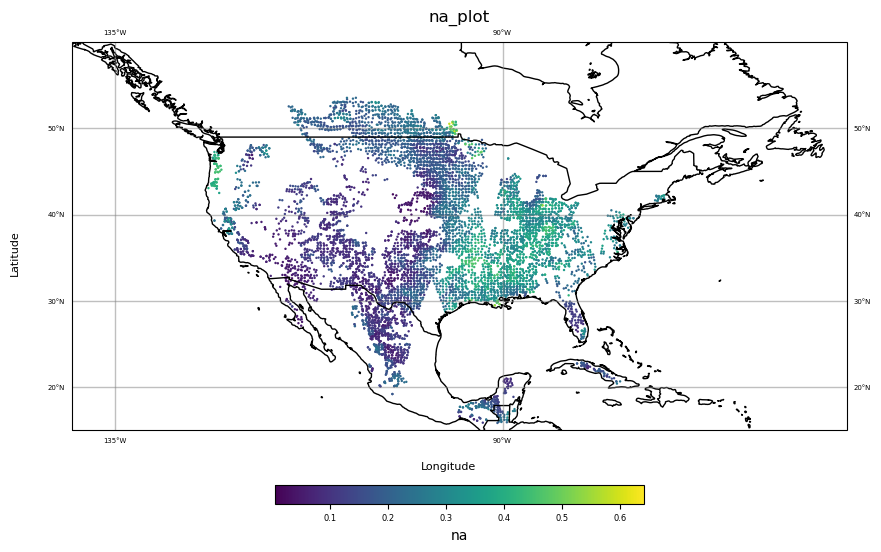

In [128]:
z = obs_fcst[ascat_obs]
x = obs_lon[ascat_obs]
y = obs_lat[ascat_obs]

toPlot = np.column_stack((z,x,y))
plot_global(toPlot)
plot_na(toPlot)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


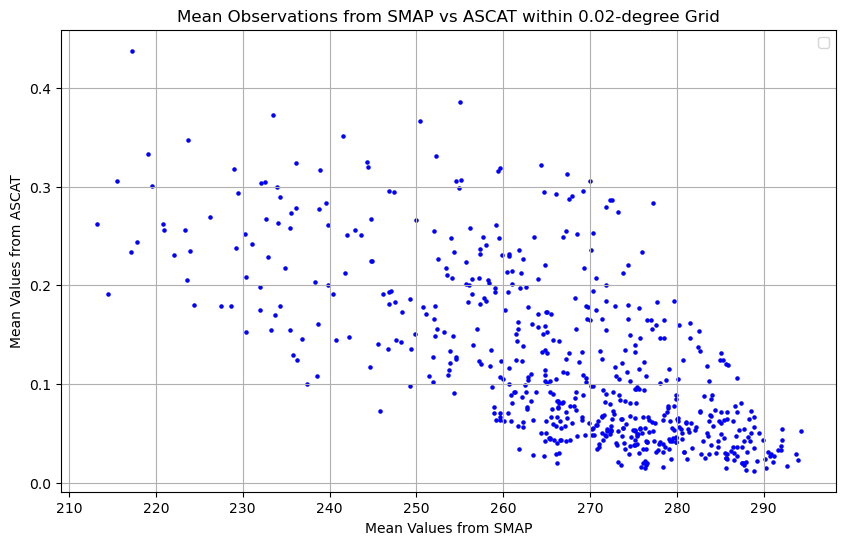

In [154]:
data_a = np.column_stack((obs_lat[smap_obs],obs_lon[smap_obs],obs_fcst[smap_obs],obs_ana[smap_obs]))
data_b = np.column_stack((obs_lat[ascat_obs],obs_lon[ascat_obs],obs_fcst[ascat_obs],obs_ana[ascat_obs]))

# Define the grid size (0.1 degrees)
grid_size = 0.02

# Function to calculate mean values within a grid
def calculate_mean_within_grid(data):
    lat_bins = np.floor(data[:, 0] / grid_size) * grid_size
    lon_bins = np.floor(data[:, 1] / grid_size) * grid_size
    
    unique_bins = np.unique(np.column_stack((lat_bins, lon_bins)), axis=0)
    mean_values = []

    for bin_coords in unique_bins:
        mask = np.logical_and(lat_bins == bin_coords[0], lon_bins == bin_coords[1])
        values_within_bin = data[mask, 2]
        mean_value = np.mean(values_within_bin)
        mean_values.append([bin_coords[0], bin_coords[1], mean_value])
    
    return np.array(mean_values)

# Calculate mean values within the same grid for datasets A and B
mean_a = calculate_mean_within_grid(data_a)
mean_b = calculate_mean_within_grid(data_b)

# Create a dictionary to store mean values for each grid cell
mean_dict_a = {(lat, lon): value for lat, lon, value in mean_a}
mean_dict_b = {(lat, lon): value for lat, lon, value in mean_b}

# Match mean values for the same latitudes and longitudes
matched_values_a = []
matched_values_b = []

for lat, lon, value in mean_a:
    b_value = mean_dict_b.get((lat, lon), 0.0)
    if b_value != 0.0:  # Filter out locations where B value is zero
        matched_values_a.append(value)
        matched_values_b.append(b_value)

matched_values_a = np.array(matched_values_a)
matched_values_b = np.array(matched_values_b)

# Plot mean values from A against mean values from B
plt.figure(figsize=(10, 6))
plt.scatter(matched_values_a, matched_values_b, s=5, color='blue')
plt.xlabel('Mean Values from SMAP')
plt.ylabel('Mean Values from ASCAT')
plt.title('Mean Observations from SMAP vs ASCAT within 0.02-degree Grid')
plt.legend()
plt.grid()
plt.show()

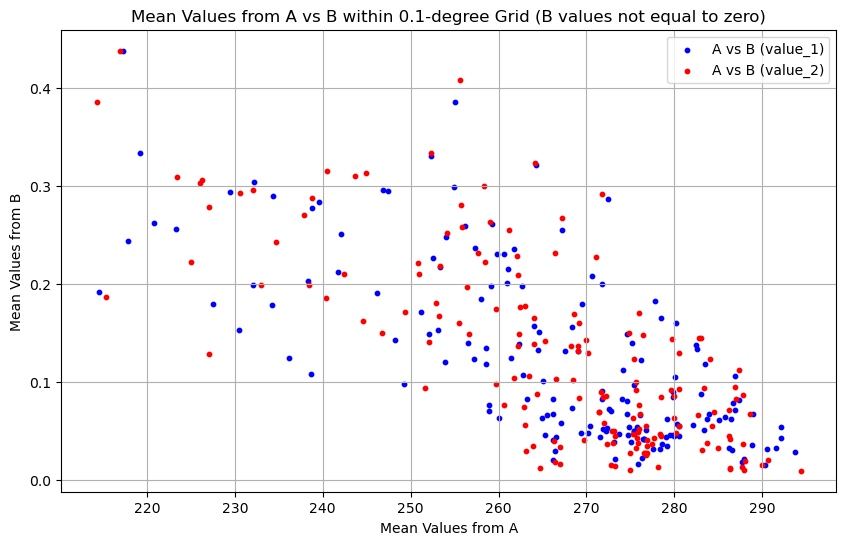

In [158]:
# Define the grid size (0.1 degrees)
grid_size = 0.01

# Function to calculate mean values within a grid
def calculate_mean_within_grid(data):
    lat_bins = np.floor(data[:, 0] / grid_size) * grid_size
    lon_bins = np.floor(data[:, 1] / grid_size) * grid_size
    
    unique_bins = np.unique(np.column_stack((lat_bins, lon_bins)), axis=0)
    mean_values = []

    for bin_coords in unique_bins:
        mask = np.logical_and(lat_bins == bin_coords[0], lon_bins == bin_coords[1])
        values_within_bin = data[mask, 2:]  # Extract value_1 and value_2 columns
        mean_values_bin = np.mean(values_within_bin, axis=0)
        mean_values.append([bin_coords[0], bin_coords[1], mean_values_bin[0], mean_values_bin[1]])
    
    return np.array(mean_values)

# Calculate mean values within the same grid for datasets A and B
mean_a = calculate_mean_within_grid(data_a)
mean_b = calculate_mean_within_grid(data_b)

# Create a dictionary to store mean values for each grid cell
mean_dict_a = {(lat, lon): (value_1, value_2) for lat, lon, value_1, value_2 in mean_a}
mean_dict_b = {(lat, lon): (value_1, value_2) for lat, lon, value_1, value_2 in mean_b}

# Match mean values for the same latitudes and longitudes
matched_values_a_1 = []
matched_values_a_2 = []
matched_values_b_1 = []
matched_values_b_2 = []

for lat, lon, value_1, value_2 in mean_a:
    b_values = mean_dict_b.get((lat, lon), (0.0, 0.0))
    if b_values != (0.0, 0.0):  # Filter out locations where B values are both zero
        matched_values_a_1.append(value_1)
        matched_values_a_2.append(value_2)
        matched_values_b_1.append(b_values[0])
        matched_values_b_2.append(b_values[1])

matched_values_a_1 = np.array(matched_values_a_1)
matched_values_a_2 = np.array(matched_values_a_2)
matched_values_b_1 = np.array(matched_values_b_1)
matched_values_b_2 = np.array(matched_values_b_2)

# Plot mean values from A and B on the same axis for value_1 and value_2
plt.figure(figsize=(10, 6))

plt.scatter(matched_values_a_1, matched_values_b_1, s=10, color='blue', label='A vs B (value_1)')
plt.scatter(matched_values_a_2, matched_values_b_2, s=10, color='red', label='A vs B (value_2)')

plt.xlabel('Mean Values from A')
plt.ylabel('Mean Values from B')
plt.title('Mean Values from A vs B within 0.1-degree Grid (B values not equal to zero)')
plt.legend()
plt.grid()
plt.show()

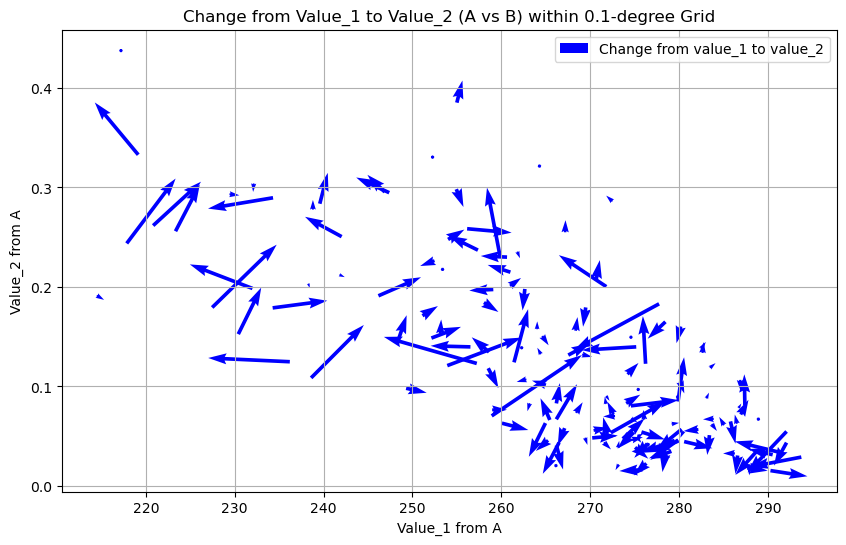

In [159]:
# Calculate the differences between value_1 and value_2 for each grid point
diff_value_a = matched_values_a_2 - matched_values_a_1
diff_value_b = matched_values_b_2 - matched_values_b_1

# Plot vector plot to show changes from value_1 to value_2
plt.figure(figsize=(10, 6))
plt.quiver(matched_values_a_1, matched_values_b_1, diff_value_a, diff_value_b,
           angles='xy', scale_units='xy', scale=1, color='blue', label='Change from value_1 to value_2')
plt.xlabel('Value_1 from A')
plt.ylabel('Value_2 from A')
plt.title('Change from Value_1 to Value_2 (A vs B) within 0.1-degree Grid')
plt.legend()
plt.grid()
plt.show()

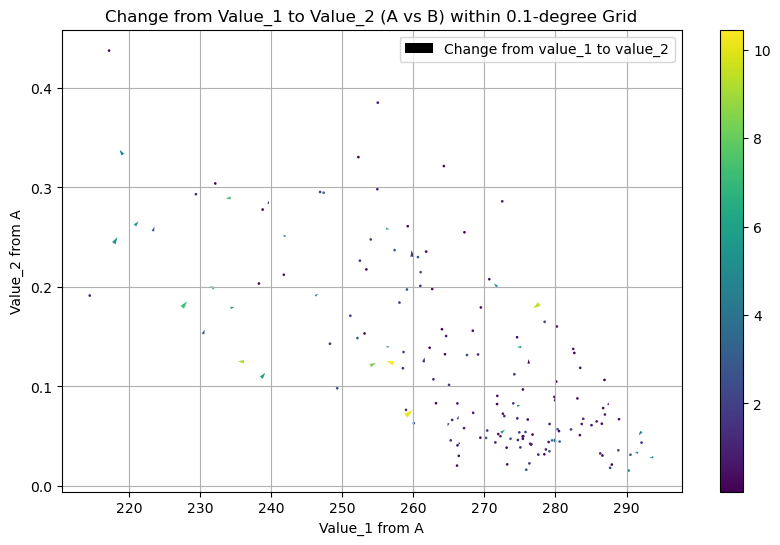

In [172]:
# Calculate the differences between value_1 and value_2 for each grid point
diff_value_a = matched_values_a_2 - matched_values_a_1
diff_value_b = matched_values_b_2 - matched_values_b_1

# Calculate the magnitude of the changes
magnitude = np.sqrt(diff_value_a**2 + diff_value_b**2)

# Normalize the differences to ensure arrows have the same length
normalized_diff_value_a = diff_value_a / magnitude.max()
normalized_diff_value_b = diff_value_b / magnitude.max()

# Plot vector plot to show changes from value_1 to value_2
plt.figure(figsize=(10, 6))
quiver = plt.quiver(matched_values_a_1, matched_values_b_1, normalized_diff_value_a, normalized_diff_value_b,
           magnitude, angles='xy', scale_units='xy', scale=1, cmap='viridis', label='Change from value_1 to value_2')

plt.colorbar(quiver)
plt.xlabel('Value_1 from A')
plt.ylabel('Value_2 from A')
plt.title('Change from Value_1 to Value_2 (A vs B) within 0.1-degree Grid')
plt.legend()
plt.grid()
plt.show()